# Data Preprocessing

In [1]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

# Importing data

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
df = pd.read_csv('braznikova.csv', sep=';')

In [4]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,9,1,MAF,1,3,659,"76,85",1092.0,0,0,0,0,1,13884.0
1,22,1,MAF,1,"4,1",1518,"84,86",348.0,0,0,0,1,1,11700.0
2,13,1,MAF,1,3,476,"112,02",504.0,0,0,0,1,1,6786.0
3,18,1,MAF,1,3,1310,"119,80",418.0,0,0,0,1,1,12948.0
4,25,1,Include apartment,1,4,2029,"94,88",108.0,0,0,0,0,0,11427.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,"40,78",1,MAF,2,4,6884,"107,37",337.0,0,0,0,0,0,9399.0
65,"21,5",1,MAF,1,"2,3",4721,"89,13",668.0,0,1,1,0,0,14079.0
66,"115,23",1,MAF,1,3,3286,"105,62",295.0,0,0,0,0,0,11427.0
67,"34,8",1,Include apartment,2,"4,3",3963,"168,07",0.0,0,1,1,0,0,13338.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      69 non-null     object 
 1   X2      69 non-null     int64  
 2   X3      69 non-null     object 
 3   X4      69 non-null     int64  
 4   X5      69 non-null     object 
 5   X6      69 non-null     int64  
 6   X7      62 non-null     object 
 7   X8      64 non-null     float64
 8   X9      69 non-null     int64  
 9   X10     69 non-null     int64  
 10  X11     69 non-null     int64  
 11  X12     69 non-null     int64  
 12  X13     69 non-null     int64  
 13  Y       64 non-null     float64
dtypes: float64(2), int64(8), object(4)
memory usage: 7.7+ KB


In [6]:
df.shape

(69, 14)

# Данный датасет содержит 14 разных переменных и 69 значений.
Х1 - Торговельна площа, кв. м. (object)
X2 - Этаж (int)
X3 - Тип (object)
X4 - Количество касс (int)
X5 - Рейтинг в гуглі (object)
X6 - Количество чеков (int)
X7 - Средний чек (object)
X8 - Офіси (float)
X9 - Магазин мобільного звязку (int)
X10 - Продуктовий ринок (int)
X11 - Речовий ринок (int)
X12 - Транзитна зупинка міжміського ГТ (int)
X13 - Зупинка ГТ (int)
Y - Середній дохід наcелення,грн (float)

Для данной задачи выбрано прогнозировать какой доход у населения, исходя из всех предоставленных параметров. И как эти параметры влияют на У.

# Visualization

<AxesSubplot:ylabel='Frequency'>

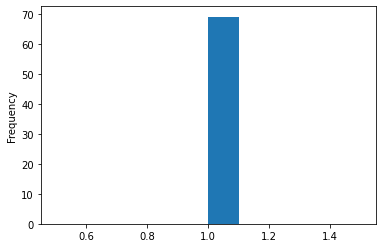

In [7]:

# Feature distribution
df['X2'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

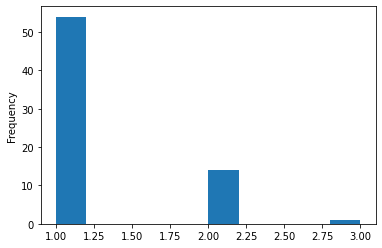

In [8]:

# Feature distribution
df['X4'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

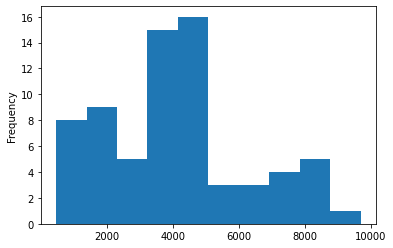

In [9]:

# Feature distribution
df['X6'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

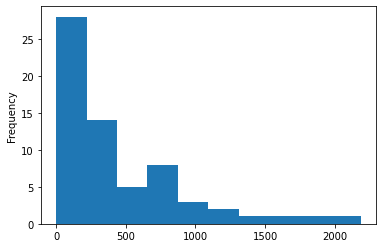

In [10]:

# Feature distribution
df['X8'].plot(kind = 'hist')

Выводы: Х2 (этаж) - не вариативная. Переменная Х8 (офисы) - имеет длинный хвост.

# Missing data

In [11]:
# Cheking Missing data
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     7
X8     5
X9     0
X10    0
X11    0
X12    0
X13    0
Y      5
dtype: int64

Переменная Х7, Х8 и У содержат пропуски

In [12]:
#!pip install sklearn

In [13]:
# Taking care of missing data
dfm = df

from sklearn.impute import SimpleImputer
#numeric

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

dfm[['X8']] = imputer_mean.fit_transform(dfm[['X8']]).round()
dfm[['Y']] = imputer_mean.fit_transform(dfm[['Y']]).round()


#strings
imputer_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dfm[['X7']] = imputer_freq.fit_transform(dfm[['X7']])

In [14]:
dfm.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
Y      0
dtype: int64

Пропуски по переменным заполнены.

# Outliers

In [15]:
df['X1'].describe()

count     69
unique    52
top       22
freq       4
Name: X1, dtype: object

In [16]:
dfm['X6'].describe()

count      69.000000
mean     4084.101449
std      2213.335666
min       476.000000
25%      2344.000000
50%      3995.000000
75%      4826.000000
max      9687.000000
Name: X6, dtype: float64

In [17]:
# Outliers
X6 = []
for k in dfm['X6']:
    if k > round(dfm['X6'].mean() + 3*dfm['X6'].std()):
        k = round(dfm['X6'].mean() + 3*dfm['X6'].std()) 
    X6.append(k)
dfm['X6'] = X6

In [18]:
dfm['X6'].describe()

count      69.000000
mean     4084.101449
std      2213.335666
min       476.000000
25%      2344.000000
50%      3995.000000
75%      4826.000000
max      9687.000000
Name: X6, dtype: float64

In [19]:
dfm['X8'].describe()

count      69.000000
mean      439.884058
std       442.698760
min         0.000000
25%       126.000000
50%       348.000000
75%       573.000000
max      2185.000000
Name: X8, dtype: float64

In [20]:
# Outliers
X8 = []
for n in dfm['X8']:
    if n > round(dfm['X8'].mean() + 3*dfm['X8'].std()):
        n = round(dfm['X8'].mean() + 3*dfm['X8'].std()) 
    X8.append(n)
dfm['X8'] = X8

In [21]:
dfm['X8'].describe()

count      69.000000
mean      433.840580
std       420.831307
min         0.000000
25%       126.000000
50%       348.000000
75%       573.000000
max      1768.000000
Name: X8, dtype: float64

In [22]:
dfm.shape

(69, 14)

Таким образом, были проверены переменные (которые по графику были похожи на выбросы) и у фактора Х8 значения, которые выходят за 3 сигма - заменены на максимальное.

# Encoding

In [24]:

# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [25]:
# Encoding categorical data
dfm = encoding_char(df)
dfm

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,0,1,0,1,0,659,0,1092.0,0,0,0,0,1,13884.0
1,1,1,0,1,1,1518,1,348.0,0,0,0,1,1,11700.0
2,2,1,0,1,0,476,2,504.0,0,0,0,1,1,6786.0
3,3,1,0,1,0,1310,3,418.0,0,0,0,1,1,12948.0
4,4,1,1,1,2,2029,4,108.0,0,0,0,0,0,11427.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,49,1,0,2,2,6884,56,337.0,0,0,0,0,0,9399.0
65,8,1,0,1,13,4721,57,668.0,0,1,1,0,0,14079.0
66,50,1,0,1,0,3286,58,295.0,0,0,0,0,0,11427.0
67,51,1,1,2,7,3963,59,0.0,0,1,1,0,0,13338.0


# Correlations

In [28]:
#!pip install seaborn

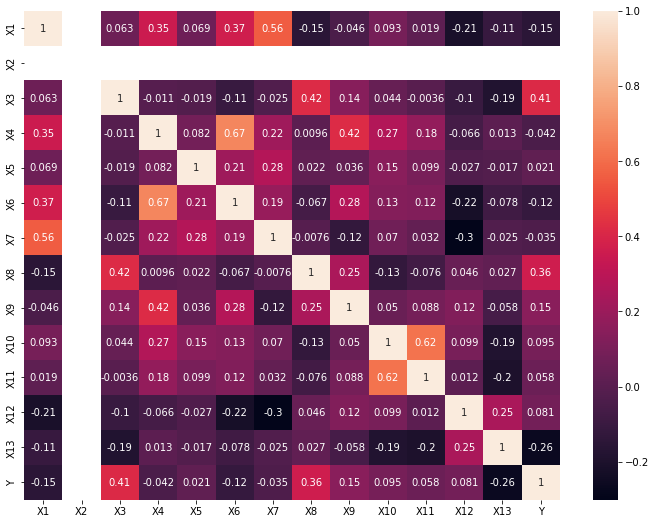

In [29]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Высокая корреляция: 
    
    Х4 и Х6 - убрать из модели Х4
    Х10 и Х11 - убрать из модели Х11
    Х1 и Х7 - убрать из модели Х7
    
    НА зависимую переменную наибольшим образом влияет тип магазина и количество офисов (лучшие условие - люди с большим доходом)

In [35]:
# Removing Correlated Data
dfr = df.drop(['X2','X4','X7','X11'], axis='columns', inplace=False)
dfr.shape

(69, 10)

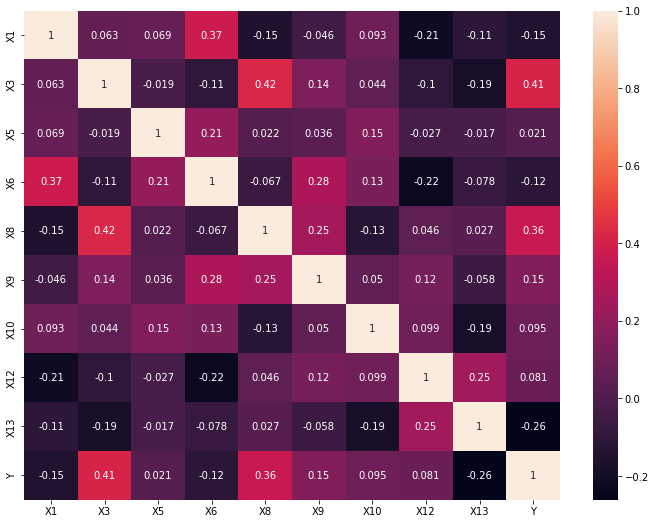

In [38]:
# Cheking correlations
import seaborn as sns
corrmat = dfr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

# Exporting

In [36]:
# Exporting the dataset
dfm.to_csv('br_prep.csv', sep=';', index=False)

In [37]:
# Exporting the dataset
dfr.to_csv('br_prep1.csv', sep=';', index=False)